<a href="https://colab.research.google.com/github/Mahnoor3028/Speech_Emotion_Recognition/blob/main/SER_Main_File_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np
import soundfile
import librosa
import os
import glob
import cv2
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam


In [ ]:
pip install librosa

**Basic CNN structure**

In [ ]:
cnn_image=cv2.imread('/content/drive/MyDrive/Basic CNN structure.png')

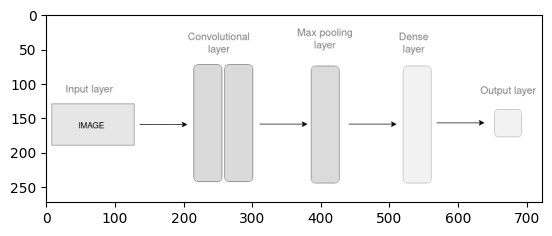

In [ ]:
grayimage = cv2.cvtColor(cnn_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage, cmap='gray')

**Architecture of Proposed CNN Model**

In [ ]:
architecture_image=cv2.imread('/content/drive/MyDrive/Architecture of Proposed CNN Model.png')

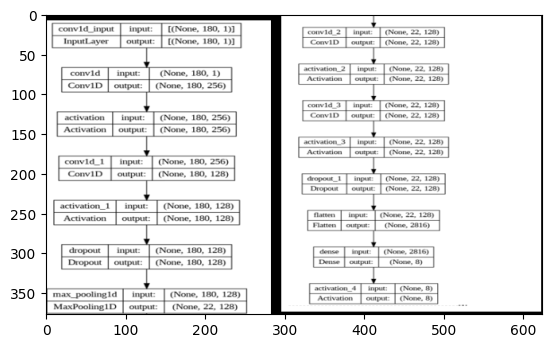

In [ ]:
grayimage = cv2.cvtColor(architecture_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage, cmap='gray')

**Plot Spectrogram**

In [ ]:
def plot_spectrogram(file_path):
    # Load the audio file using Librosa
    audio, sr = librosa.load(file_path)

    # Compute the spectrogram using Librosa
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

    # Convert power spectrogram to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram ')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.show()

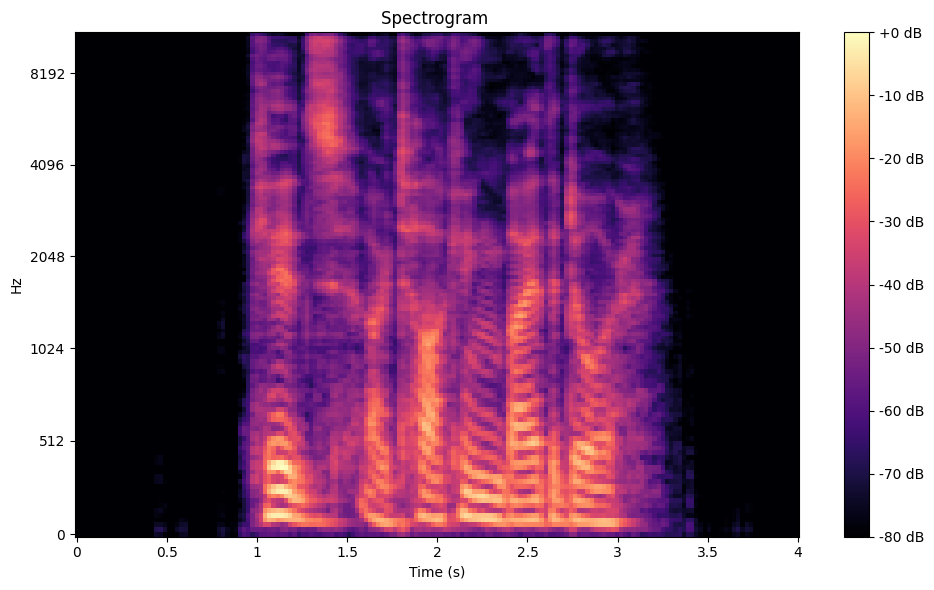

In [ ]:
file_path = '/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-01-02-01.wav'
plot_spectrogram(file_path)

**Feature Extraction**

In [ ]:
def extract_feature(data, sr, mfcc, chroma, mel):
    if chroma:
        stft = np.abs(librosa.stft(data))
    result = np.array([])

    if mfcc:
        my_mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        result = np.hstack((result, my_mfccs))

    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis = 0)
        result = np.hstack((result, chroma))

    if mel:
        mel=np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
        result = np.hstack((result, mel))

    return result

In [ ]:
def data_noising(data, noise_factor):
  noise = np.random.randn(len(data))
  augmented_data = data + noise_factor * noise

  augmented_data = augmented_data.astype(type(data[0]))
  return augmented_data

In [ ]:
def data_shifting(data, sampling_rate, shift_max, shift_direction):
  shift = np.random.randint(sampling_rate * shift_max)
  if shift_direction == 'right':
    shift = -shift
  # elif shift_direction == 'both':
  #   direction = np.random.randint(0, 2)
  #   if direction == 1:
  #     shift = -shift
  shift_augmented_data = np.roll(data, shift)
  if shift > 0:
    shift_augmented_data[:shift] = 0
  else:
    shift_augmented_data[shift:] = 0

  return shift_augmented_data

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}

In [ ]:
# Load the data and extract features for each sound file
def load_data():
    x_feature, y_label = [], []
    for file in glob.glob("/content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        print('filename', file)
        data, sampling_rate = librosa.load(file)
        base_name = os.path.basename(file)
        emotion = emotions[base_name.split("-")[2]] # extracting the third value which is the motion number
        feature = extract_feature(data, sampling_rate, mfcc=True, chroma=True, mel=True)
        x_feature.append(feature)
        y_label.append(emotion)


        noise_data = data_noising(data, 0.001)
        noise_feature = extract_feature(noise_data, sampling_rate, mfcc=True, chroma=True, mel=True)
        x_feature.append(noise_feature)
        y_label.append(emotion)

        shifted_data = data_shifting(data, sampling_rate, 0.25, 'right')
        shifted_feature = extract_feature(shifted_data, sampling_rate, mfcc=True, chroma=True, mel=True)
        x_feature.append(shifted_feature)
        y_label.append(emotion)

    return np.array(x_feature), y_label

In [ ]:
# loading Dataset
x_loaded_data, y_loaded_data = load_data()


filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-02-01-01-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-01-01-01-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-01-01-01-02-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-01-01-02-02-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-02-01-02-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-02-01-02-02-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-01-01-02-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-02-01-01-02-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-03-02-02-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-04-01-02-01-22.wav
filename /content/drive/MyDrive/Audio_Speech_Actors_01-24/Actor_22/03-01-03-02-0

In [ ]:
# spliting dataset
x_train, x_test, y_train, y_test = train_test_split(x_loaded_data, y_loaded_data, test_size=0.25, random_state=9)

# x_train, x_test, y_train, y_test = train_test_split(x_loaded_data, y_loaded_data, test_size=0.20, random_state=15)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25,random_state=15)


In [ ]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3089, 180), (3089,), (1030, 180), (1030,))

In [ ]:
x_traincnn = np.expand_dims(x_train, axis=2)
# x_valcnn = np.expand_dims(x_val, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)
# (3098, 180, 1)

In [ ]:
x_traincnn.shape, x_testcnn.shape


((3089, 180, 1), (1030, 180, 1))

In [ ]:
print("Train data: ", x_train.shape[0], "\nValidation data: ", "\nTest data: ", x_test.shape[0])

Train data:  3089 
Validation data:  
Test data:  1030


In [ ]:
print(f'Features(Emotions) extracted: {x_train.shape[1]} emotions')

Features(Emotions) extracted: 180 emotions


In [ ]:
#Encoding data label
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print('mapping', le_name_mapping)

y_train = labelencoder.transform(y_train)
# y_val = labelencoder.transform(y_val)
y_test = labelencoder.transform(y_test)

mapping {'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}


In [ ]:
from keras.engine.base_layer import regularizers
model = Sequential()

model.add(Conv1D(256, 5, padding='same', input_shape=(180,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))


model.add(Conv1D(128, 5, padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=8,
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5)
                ))

model.add(Activation('softmax'))

# weight_decay = 1e-6
optimizer = Adam(learning_rate=0.001)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_traincnn, y_train, epochs=150, validation_data=(x_testcnn, y_test), batch_size=64)

Epoch 1/150
49/49 [==============================] - 10s 23ms/step - loss: 2.3209 - accuracy: 0.2146 - val_loss: 1.9016 - val_accuracy: 0.3447
Epoch 2/150
49/49 [==============================] - 0s 10ms/step - loss: 1.9102 - accuracy: 0.3150 - val_loss: 1.7583 - val_accuracy: 0.4010
Epoch 3/150
49/49 [==============================] - 1s 11ms/step - loss: 1.7654 - accuracy: 0.3742 - val_loss: 1.6834 - val_accuracy: 0.4146
Epoch 4/150
49/49 [==============================] - 0s 10ms/step - loss: 1.6872 - accuracy: 0.4085 - val_loss: 1.6191 - val_accuracy: 0.4282
Epoch 5/150
49/49 [==============================] - 0s 10ms/step - loss: 1.5920 - accuracy: 0.4497 - val_loss: 1.5013 - val_accuracy: 0.4874
Epoch 6/150
49/49 [==============================] - 0s 10ms/step - loss: 1.5220 - accuracy: 0.4746 - val_loss: 1.4359 - val_accuracy: 0.5155
Epoch 7/150
49/49 [==============================] - 0s 10ms/step - loss: 1.4565 - accuracy: 0.5157 - val_loss: 1.3619 - val_accuracy: 0.5515
Epoch

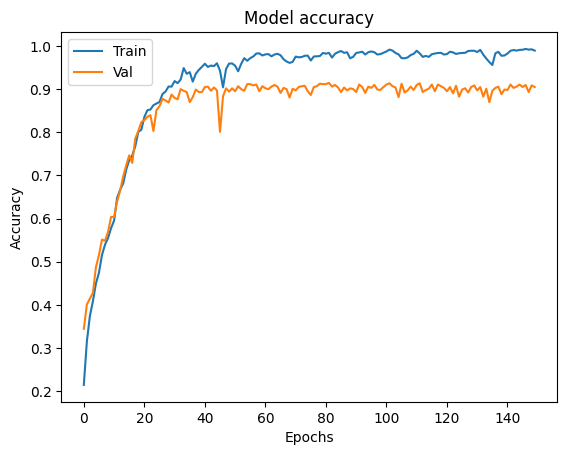

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


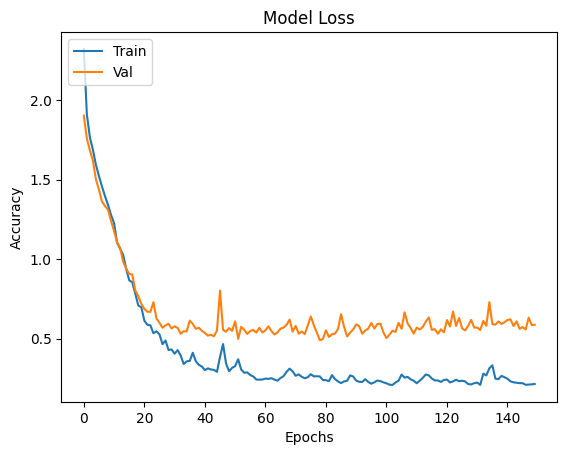

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Test Training model**

In [ ]:
y_pred = model.predict(x_testcnn)

33/33 [==============================] - 1s 3ms/step


**Confusion matrix**

<Axes: >

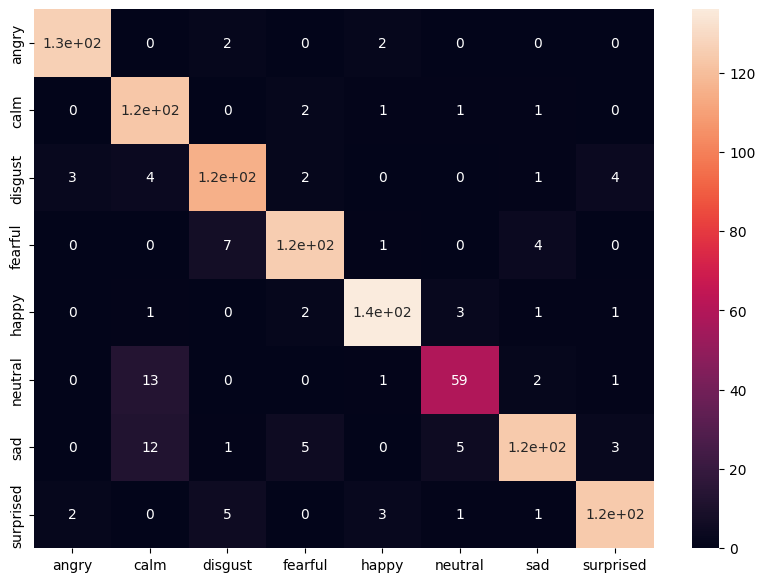

In [ ]:
conf_emotion = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
matrix = metrics.confusion_matrix(y_test, np.argmax(y_pred, axis=-1))
df_cm = pd.DataFrame(matrix, index=[i for i in conf_emotion], columns=[i for i in conf_emotion])

plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True)


In [ ]:
# F1 score
f1_score(y_test, np.argmax(y_pred, axis=-1), average='weighted')

0.904665176580805

In [ ]:
loss, acc = model.evaluate(x_testcnn, y_test)

print("accuract: {:5.2f}%".format(100*acc))


33/33 [==============================] - 0s 5ms/step - loss: 0.5874 - accuracy: 0.9049
accuract: 90.49%


In [ ]:
 prediciton = model.predict(x_testcnn)
 load_pred = prediciton[1]

print('prediction', load_pred)
prediction1 = np.argmax(load_pred, axis=-1)
print('prediction1', prediction1)


33/33 [==============================] - 0s 3ms/step
prediction [9.8621496e-04 3.0651556e-02 7.6477915e-01 2.1094711e-04 3.5921729e-04
 1.3123171e-01 3.4921233e-02 3.6859956e-02]
prediction1 2


In [ ]:
# model.save('/content/drive/MyDrive/model2.h5')

In [ ]:
from keras.models import load_model

model1 = load_model('/content/drive/MyDrive/model2.h5')

In [ ]:
loss1, acc1 = model.evaluate(x_testcnn, y_test)

print("accuract: {:5.2f}%".format(100*acc1))

33/33 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.9049
accuract: 90.49%


In [ ]:
y_pred = model.predict(x_testcnn)
load_pred1 = y_pred[1]

print('prediction', load_pred1)
prediction2 = np.argmax(load_pred1, axis=-1)
print('prediction1', prediction2)


33/33 [==============================] - 0s 3ms/step
prediction [9.8621496e-04 3.0651556e-02 7.6477915e-01 2.1094711e-04 3.5921729e-04
 1.3123171e-01 3.4921233e-02 3.6859956e-02]
prediction1 2


**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

In [ ]:
new_label = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
final_label = new_label
new_class = 8

In [ ]:
#ravel flatten the array into single vector
y_pred_ravel = y_pred.ravel()
lw = 2

In [ ]:
#fpr = dict()
#tpr = dict()
#roc_auc = dict()

#for i in range(new_class):
   # fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
   # roc_auc[i] = auc(fpr[i], tpr[i])

#colors = cycle(['red', 'green','black'])
#colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
#for i, color in zip(range(new_class), colors):
   # plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             #label='ROC curve of class {0}'''.format(final_label[i]))
    #plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#plt.xlim([0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
#plt.legend(loc="lower right")
#plt.show()